In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft,fftshift

In [4]:
%matplotlib notebook

# Aliasing and Folding

In [11]:
SW=100
d=65
dt=1/SW
N=100
t=np.arange(N)*dt
tTPPI=np.arange(2*N)*(dt/2)
SI=512

T2=.3

Iref=np.exp(1j*2*np.pi*d*tTPPI)*np.exp(-tTPPI/T2)
IStates=np.exp(1j*2*np.pi*d*t)*np.exp(-t/T2)

ITPPI=np.zeros(tTPPI.shape,dtype=complex)
ITPPI[0::4]=np.cos(2*np.pi*d*tTPPI[0::4])*np.exp(-tTPPI[0::4]/T2)
ITPPI[1::4]=np.sin(2*np.pi*d*tTPPI[1::4])*np.exp(-tTPPI[1::4]/T2)
ITPPI[2::4]=-np.cos(2*np.pi*d*tTPPI[2::4])*np.exp(-tTPPI[2::4]/T2)
ITPPI[3::4]=-np.sin(2*np.pi*d*tTPPI[3::4])*np.exp(-tTPPI[3::4]/T2)

IST=np.zeros(t.shape,dtype=complex)
IST[0::2]=np.exp(1j*2*np.pi*d*t[0::2])*np.exp(-t[0::2]/T2)
IST[1::2]=-np.exp(1j*2*np.pi*d*t[1::2])*np.exp(-t[1::2]/T2)

In [12]:
Sref=fftshift(fft(np.concatenate((Iref[:1]/2,Iref[1:])),SI*2)).real
SStates=fftshift(fft(np.concatenate((IStates[:1]/2,IStates[1:])),SI)).real
STPPI=fft(np.concatenate((ITPPI[:1]/2,ITPPI[1:])),SI*2)[SI:].real
SST=fft(np.concatenate((IST[:1]/2,IST[1:])),SI).real

f=1/(2*dt)*np.linspace(-1,1,SI)
f-=np.diff(f[:2])/2

fref=1/dt*np.linspace(-1,1,SI*2)
fref-=np.diff(fref[:2])/2

<IPython.core.display.Javascript object>


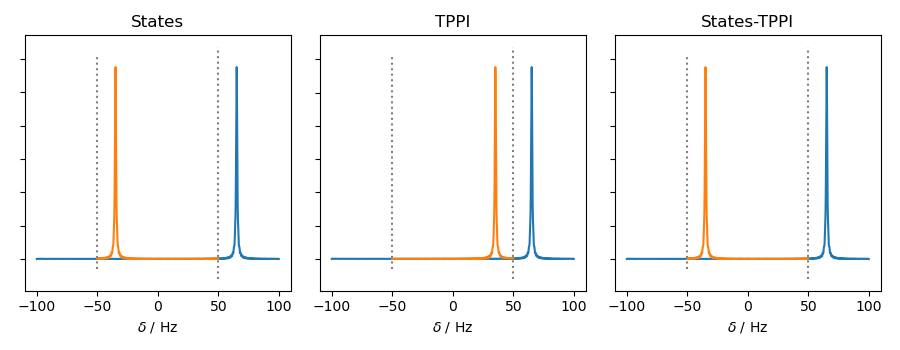

In [17]:
fig,ax=plt.subplots(1,3)
titles=['States','TPPI','States-TPPI']
ax=ax.flatten()
for f0,S,title,a in zip([f,f,f],[SStates,STPPI,SST],titles,ax):
    a.plot(fref,Sref/2)
    a.plot(f0,S)
    a.set_title(title)
    a.set_xlabel(r'$\delta$ / Hz')
#     a.set_ylim([-3,11])
    a.plot(-50*np.ones(2),a.get_ylim(),linestyle=':',color='grey')
    a.plot(50*np.ones(2),a.get_ylim(),linestyle=':',color='grey')
    a.set_yticklabels('')
fig.set_size_inches([9,3.5])
fig.tight_layout()

# Avoid folding

In [34]:
SW=100
d=65
dt=1/SW
N=100
t=np.arange(N)*dt
SI=512

T2=.5

noise=.15
I=np.exp(1j*2*np.pi*d*t)*np.exp(-t/T2)+np.random.randn(*t.shape)*noise
Idouble=np.exp(1j*2*np.pi*d*tTPPI)*np.exp(-tTPPI/T2)/2+np.random.randn(*tTPPI.shape)*noise/np.sqrt(2)

In [35]:
S=fftshift(fft(np.concatenate((I[:1]/2,I[1:])),SI)).real
Sdouble=fftshift(fft(np.concatenate((Idouble[:1]/2,Idouble[1:])),SI*2)).real

<IPython.core.display.Javascript object>


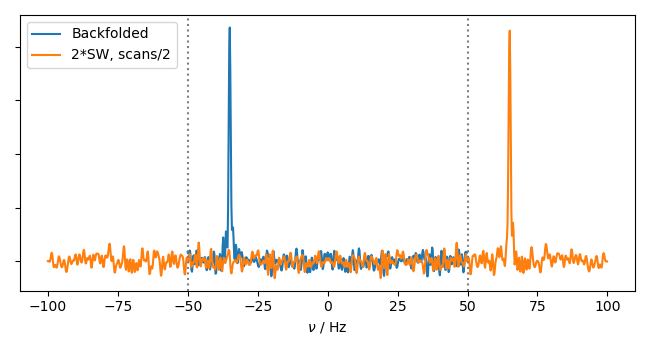

In [44]:
fig,ax=plt.subplots()
titles=['States','TPPI','States-TPPI']
ax.plot(f,S,label='Backfolded')
ax.plot(fref,Sdouble,label='2*SW, scans/2')
ax.set_yticklabels('')
ax.legend(loc='upper left')
ax.set_xlabel(r'$\nu$ / Hz')
yl=ax.get_ylim()
ax.set_ylim(yl)
ax.plot([-SW/2,-SW/2],yl,color='grey',linestyle=':')
ax.plot([SW/2,SW/2],yl,color='grey',linestyle=':')
fig.set_size_inches([6.5,3.5])
fig.tight_layout()